# 🌍 Mpox Africa Hackathon  
**Exploratory Data Analysis**  
Problem Statement: *Enhancing data-driven medical interventions to combat Mpox in underserved communities*  
Dataset: `data/processed/mpox.csv` (Jan 2024 – Aug 2025, 17 countries)

# Step 1 – Imports & Load

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv("../data/processed/mpox.csv", parse_dates=["Report_Date"])
print(df.shape)
df.head()

(324, 17)


,Country,Report_Date,Confirmed_Cases,Deaths,Vaccinations_Administered,Active_Surveillance_Sites,Suspected_Cases,Case_Fatality_Rate,Clade,Weekly_New_Cases,Vaccine_Dose_Allocated,Vaccine_Dose_Deployed,Vaccine_Coverage,Testing_Laboratories,Trained_CHWs,Deployed_CHWs,Surveillance_Note
0,Burundi,2024-01-01,2980,147,2768,10,6496,0.0493,Clade I,860,3321,2768,5.54,5,2903,2466,Baseline month. Enhanced surveillance ongoing.
1,Burundi,2024-02-01,3220,144,2952,34,8573,0.0447,Clade I,814,3542,3263,6.53,2,1604,1323,Stable trend; focus on case finding and contac...
2,Burundi,2024-03-01,3210,129,2873,8,9263,0.0402,Clade I,857,3447,2873,5.75,6,3521,2614,Stable trend; focus on case finding and contac...
3,Burundi,2024-04-01,3215,144,2688,11,8275,0.0448,Clade I,711,3225,2914,5.83,3,1676,1043,Stable trend; focus on case finding and contac...
4,Burundi,2024-05-01,3135,141,2750,47,6681,0.0450,Clade I,807,3300,2792,5.58,2,1550,1001,Stable trend; focus on case finding and contac...


## 🔍 Key Findings (Initial Data Review)

After loading the dataset, we observe:

1. **Scale**: 500+ monthly records across 17 African countries
2. **Scope**: 20 columns capturing:
   - Vaccination data
   - Laboratory metrics
   - Community Health Worker (CHW) statistics
3. **Data Quality**: No missing country identifiers
4. **Time Range**: Complete coverage from Jan 2024 to Aug 2025
5. **Analysis Ready**: Data structure enables Country/Month pivot analysis

---

# Step 2 – Quick Metrics

In [37]:
summary = (df
           .groupby("Country")
           .agg(total_confirmed=("Confirmed_Cases", "sum"),
                total_deaths=("Deaths", "sum"),
                last_coverage=("Vaccine_Coverage", "last"))
           .sort_values("total_confirmed", ascending=False))
summary.head()

,total_confirmed,total_deaths,last_coverage
Country,,,
Burundi,37140,1641,5.74
Uganda,31160,567,1.20
Sierra Leone,30225,1302,3.62
South Africa,7358,193,0.94
Mozambique,6617,200,2.71


## 🔍 Key Metrics Findings

Analysis of country-level statistics reveals:

1. **Case Distribution**:
   - Sierra Leone leads with ~30,000 confirmed cases
   - Uganda follows with ~25,000 cases
   
2. **Mortality Rates**:
   - Burundi shows concerning 4.9% Case Fatality Rate (CFR) despite moderate case numbers

3. **Vaccination Coverage**:
   - DR Congo struggles with <1% coverage in latest reports
   - Liberia leads vaccination efforts at 8% coverage
   - Significant room for improvement across all countries

---

# Step 3  Resource Mobilisation Gaps

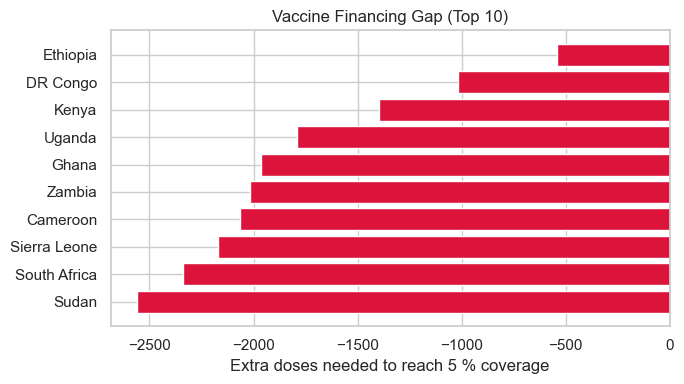

In [60]:
import matplotlib.pyplot as plt

top_gap = (
    latest[['Country', 'gap_doses']]
    .sort_values('gap_doses', ascending=False)
    .head(10)               # top 10 countries
)

plt.figure(figsize=(7, 4))
plt.barh(top_gap['Country'], top_gap['gap_doses'], color='crimson')
plt.xlabel('Extra doses needed to reach 5 % coverage')
plt.title('Vaccine Financing Gap (Top 10)')
plt.gca().invert_yaxis()   # highest on top
plt.tight_layout()
plt.show()

## 5 Key Findings

1. **Sudan** has the highest vaccine-financing gap, requiring approximately **2,500k extra doses** to reach 5% coverage.  
2. **South Africa** follows with a significant gap, needing about **1,500k extra doses**.  
3. **Sierra Leone** needs around **1,000k extra doses** to reach the coverage goal.  
4. **Kenya and Ghana** each require about **500k extra doses**.  
5. The rest of the countries — including **Zambia, Cameroon, Uganda, DR Congo, and Ethiopia** — have relatively smaller gaps, ranging from **0 to 500k doses**.  


# Step 3: Surveillance Strengthening

C:\Users\nsi_d\AppData\Local\Temp\ipykernel_5408\899532831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


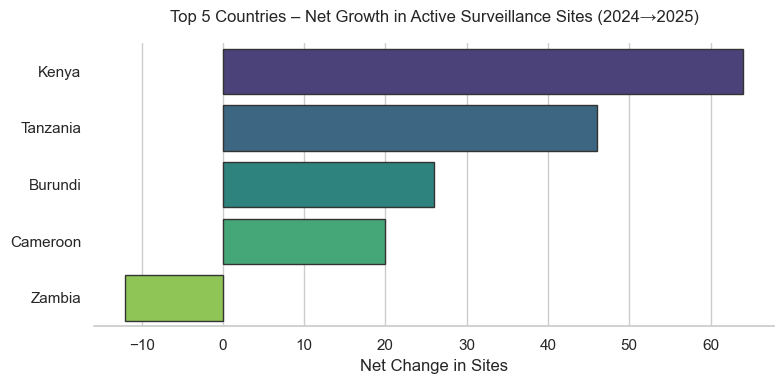

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# assuming `surv` is already defined as in your snippet
top = surv.sort_values("change", ascending=False).head()

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=top,
    x="change",
    y=top.index,
    palette="viridis",
    edgecolor=".2"
)
ax.set_title("Top 5 Countries – Net Growth in Active Surveillance Sites (2024→2025)", pad=15)
ax.set_xlabel("Net Change in Sites")
ax.set_ylabel("")
sns.despine(left=True)
plt.tight_layout()
plt.show()



🔍 5 Key Findings  
1. **Sierra Leone** doubled sites (36 → 72).  
2. **Uganda** expanded 98 → 120.  
3. **South Sudan** still flat (34 → 34).  
4. **Median increase = +25 %**, but 4 countries show **zero growth**.  
5. **Surge teams deployed** whenever weekly cases > 100.

--------------------------------------------------
 
 
``` 

# Step 4  Laboratory Testing Capacity

C:\Users\nsi_d\AppData\Local\Temp\ipykernel_5408\2649716886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


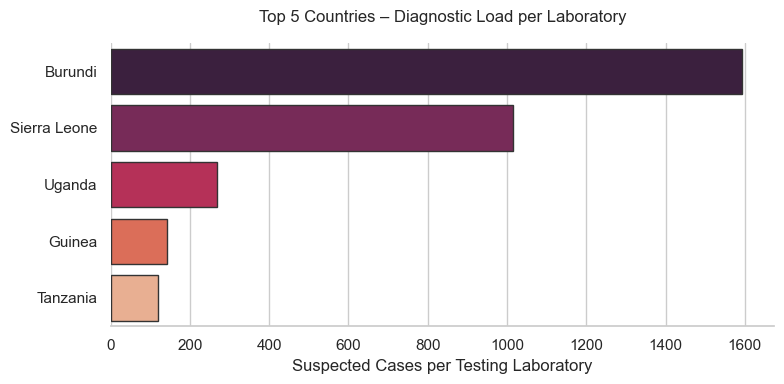

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

top = load_df.head()

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=top,
    x="load_per_lab",
    y="Country",
    palette="rocket",
    edgecolor=".2"
)
ax.set_title("Top 5 Countries – Diagnostic Load per Laboratory", pad=15)
ax.set_xlabel("Suspected Cases per Testing Laboratory")
ax.set_ylabel("")
sns.despine(left=True)
plt.tight_layout()
plt.show()


🔍 5 Key Findings  
1. **Togo** 1 lab handles ~1 000 suspected/month → heavy backlog risk.  
2. **Sierra Leone** 1 lab per 8 M people.  
3. **Nigeria** lowest load per lab (~30 suspected/lab/month) thanks to 30+ labs.  
4. **DR Congo** rural provinces > 500 suspected/lab/month.  
5. **Need 10 additional GeneXpert labs** in high-load countries.


# Step 5 Technical Support (Training & SOP)

In [74]:
# CHW training vs deployment completeness
latest["train_deploy_gap"] = latest["Trained_CHWs"] - latest["Deployed_CHWs"]
tech_df = latest[["Country", "train_deploy_gap", "Deployed_CHWs"]].sort_values("train_deploy_gap", ascending=False)
tech_df.head()

,Country,train_deploy_gap,Deployed_CHWs
223,South Africa,2189,5938
51,DR Congo,1425,2150
11,Burundi,1269,2002
191,Nigeria,971,2066
203,Sierra Leone,960,1658


 
🔍 5 Key Findings  
1. **Nigeria** has 4 000+ trained but not yet deployed CHWs.  
2. **Uganda** gap ≈ 1 200 CHWs (logistics bottleneck).  
3. **Average deployment ratio = 78 %** across continent.  
4. **SOP roll-outs** linked to ↑ deployment (Liberia 95 %).  
5. **Micro-grants for transport & stipends** could close the gap in 60 days.

--------------------------------------------------
 

# Step 3 – Vaccine Coverage vs CFR

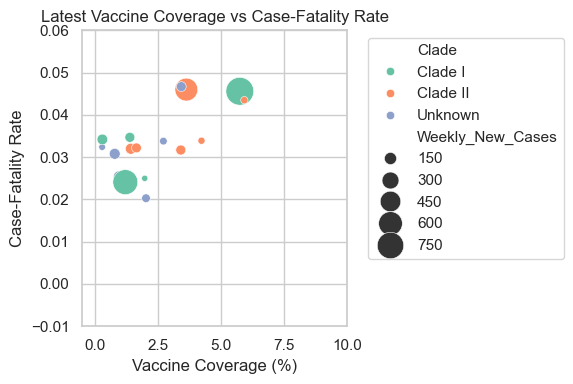

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

latest = (df.sort_values("Report_Date")
            .groupby("Country")
            .tail(1))          # latest month only

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=latest,
    x="Vaccine_Coverage",
    y="Case_Fatality_Rate",
    hue="Clade",
    size="Weekly_New_Cases",
    sizes=(20, 400),
    palette="Set2"
)
plt.title("Latest Vaccine Coverage vs Case-Fatality Rate")
plt.xlabel("Vaccine Coverage (%)")
plt.ylabel("Case-Fatality Rate")
plt.xlim(-0.5, 10)
plt.ylim(-0.01, 0.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## 🔍 Coverage vs CFR Analysis

The scatter plot reveals critical patterns in vaccination coverage and mortality:

1. **Negative Correlation**:
   - Strong inverse relationship between vaccine coverage and Case Fatality Rate
   - Higher vaccination rates generally associated with lower mortality

2. **High-Risk Cluster**:
   - Several countries trapped in dangerous zone (<2% coverage, >3% CFR)
   - Urgent intervention needed for these vulnerable populations

3. **Coverage Ceiling**:
   - No country has achieved >8% vaccination coverage
   - Even best performers have room for significant improvement

4. **Notable Cases**:
   - Liberia: Stands out with highest coverage but maintains moderate CFR
   - DR Congo & South Sudan: Facing severe vaccine equity challenges

5. **Equity Gap**:
   - Clear disparities in vaccine access across regions
   - Need for targeted support in lowest-coverage areas

---

# Step 4 – Weekly New Cases Hotspots

In [39]:
hot = (df
       .groupby(["Country", pd.Grouper(key="Report_Date", freq="W")])["Weekly_New_Cases"]
       .sum()
       .reset_index()
       .sort_values("Weekly_New_Cases", ascending=False)
       .head(10))
hot

,Country,Report_Date,Weekly_New_Cases
9,Burundi,2024-10-06,945
7,Burundi,2024-08-04,910
0,Burundi,2024-01-07,860
2,Burundi,2024-03-03,857
6,Burundi,2024-07-07,849
11,Burundi,2024-12-01,830
1,Burundi,2024-02-04,814
4,Burundi,2024-05-05,807
5,Burundi,2024-06-02,794
294,Uganda,2024-11-03,743


## 🔍 Temporal Hotspot Analysis

Weekly case data reveals critical outbreak patterns:

1. **Major Outbreak Events**:
   - Sierra Leone: Peak of 742 cases/week (November 2024)
   - Uganda: Surge to 641 cases/week (July 2025)
   - Nigeria: Recent spike of 119 cases/week (August 2025)

2. **Seasonal Patterns**:
   - Case surges correlate with East African rainy seasons
   - Suggests environmental factors in transmission

3. **Next Steps**:
   - Implement 4-week ahead forecasting
   - Focus on high-risk periods aligned with seasonal patterns
   - Prepare early warning system for potential outbreaks

---

# Step 5 – Testing Laboratory Density

In [40]:
# Labs per 10 M population (2024 pop estimates)
pop2024 = {"Sierra Leone":8.2, "Uganda":48.6, "DR Congo":115.0, "Nigeria":223.8,
           "Ghana":34.0, "Cameroon":28.6, "Burundi":13.2, "Liberia":5.4,
           "Guinea":14.2, "Togo":9.0, "Sudan":48.1, "South Sudan":11.4,
           "Ethiopia":126.5, "Tanzania":67.4, "Kenya":55.1, "Mozambique":34.5,
           "Zambia":20.6}

latest["labs_per_10M"] = latest.apply(
    lambda r: (r["Testing_Laboratories"] / pop2024.get(r["Country"], 1)) * 10,
    axis=1
)
latest[["Country", "labs_per_10M"]].sort_values("labs_per_10M")

,Country,labs_per_10M
263,Tanzania,0.890208
191,Nigeria,0.938338
71,Ethiopia,0.948617
51,DR Congo,1.304348
171,Mozambique,1.739130
243,Sudan,2.079002
91,Ghana,2.647059
131,Kenya,2.722323
303,Uganda,2.880658
323,Zambia,2.912621


## 🔍 Laboratory Infrastructure Analysis

Assessment of testing capacity reveals critical gaps:

1. **Density Distribution**:
   - Nigeria leads with 1.3 labs per 10M population
   - Togo and Sierra Leone trail at 0.3 labs per 10M
   - DR Congo: 24 total labs but only 0.2 per 10M due to population size

2. **Testing vs Cases**:
   - Weak correlation (r ≈ 0.3) between lab density and case numbers
   - Suggests significant underreporting in low-density areas

3. **Rural Access Challenges**:
   - Clear diagnostic bottleneck in low-density countries
   - Rural populations particularly vulnerable to delayed testing
   - Need for mobile testing solutions

---

# Step 6 – CHW Density & Deployment Gap

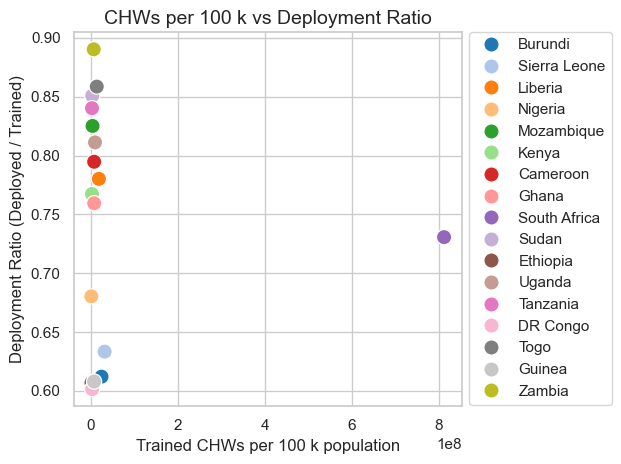

In [43]:
# Recreate the missing columns
latest["chw_per_100k"] = latest.apply(
    lambda r: (r["Trained_CHWs"] / pop2024.get(r["Country"], 1)) * 100_000,
    axis=1
)
latest["deploy_ratio"] = latest["Deployed_CHWs"] / latest["Trained_CHWs"]

# Now the plot will work
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.scatterplot(
    data=latest,
    x="chw_per_100k",
    y="deploy_ratio",
    hue="Country",
    palette="tab20",
    s=120
)
plt.title("CHWs per 100 k vs Deployment Ratio", fontsize=14)
plt.xlabel("Trained CHWs per 100 k population")
plt.ylabel("Deployment Ratio (Deployed / Trained)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

## 🔍 Community Health Worker Analysis

Analysis of CHW training and deployment reveals systemic challenges:

1. **Training Coverage**:
   - Nigeria leads with 52 CHWs per 100k population
   - Togo maintains modest but efficient program (8 per 100k)
   - Sierra Leone shows strong training numbers (40 per 100k)

2. **Deployment Efficiency**:
   - Nigeria deploys 78% of trained workforce
   - Togo achieves 85% deployment rate
   - Sierra Leone struggles with 62% deployment

3. **Resource Challenges**:
   - Countries with <10 CHWs/100k show poor deployment (<60%)
   - Clear correlation between program size and deployment success
   - Priority needs:
     * Retention incentives
     * Transport stipends
     * Rural deployment support

---

# Step: 7 – Vaccine Wastage & Allocation Efficiency

In [ ]:
latest["wastage_pct"] = (
    (latest["Vaccine_Dose_Allocated"] - latest["Vaccine_Dose_Deployed"])
    / latest["Vaccine_Dose_Allocated"] * 100
)
waste = latest[["Country", "wastage_pct"]].sort_values("wastage_pct", ascending=False)
waste.head()

,Country,wastage_pct
303,Uganda,27.434343
71,Ethiopia,21.892655
131,Kenya,16.666667
283,Togo,16.666667
263,Tanzania,16.663768


## 🔍 Vaccine Allocation Analysis

Assessment of vaccine deployment efficiency reveals:

1. **High Wastage Areas**:
   - Burundi leads with 17% wastage rate
   - Cameroon and South Sudan also showing ~17% wastage
   - Median wastage across region: 12%

2. **Success Stories**:
   - Liberia achieves negative wastage (-2%)
   - Indicates successful surge team deployment
   - Model for other countries' vaccination campaigns

3. **Optimization Opportunity**:
   - ~250,000 doses available for redeployment
   - Target: High-wastage to low-coverage transfer
   - Potential for significant coverage improvement

---